# ERP analysis

### Imports and Settings

In [1]:
import mne
import numpy as np
import matplotlib
import os

In [2]:
subject_number = 'subject9'
patient_id = 'm191'
target = 'dlpfc'
day = 'day5'
head_circumference = '58'

In [3]:
data_path = f'/Users/Bella/Desktop/Grosenick_Lab/eeg_patient_data/mdd_dlpfc/{subject_number}_{patient_id}_{target}_{head_circumference}/mne/{day}/'
raw_path_avgref = data_path + f'{patient_id}_{day}_tucker_32_filt_raw.fif'
epochs_path_avgref = data_path + f'{patient_id}_{day}_tucker_32_filt_epo.fif'
raw_path_newref = data_path + f'{patient_id}_{day}_tucker_32_filt_newref_raw.fif'
epochs_path_newref = data_path + f'{patient_id}_{day}_tucker_32_filt_newref_epo.fif'

raw_avgref = mne.io.read_raw_fif(raw_path_avgref, preload=True)
epochs_avgref = mne.read_epochs(epochs_path_avgref, preload=True)
raw_newref = mne.io.read_raw_fif(raw_path_newref, preload=True)
epochs_newref = mne.read_epochs(epochs_path_newref, preload=True)

Opening raw data file /Users/Bella/Desktop/Grosenick_Lab/eeg_patient_data/mdd_dlpfc/subject9_m191_dlpfc_58/mne/day5/m191_day5_tucker_32_filt_raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257) active
    Range : 0 ... 113765 =      0.000 ...   113.765 secs
Ready.
Reading 0 ... 113765  =      0.000 ...   113.765 secs...
Reading /Users/Bella/Desktop/Grosenick_Lab/eeg_patient_data/mdd_dlpfc/subject9_m191_dlpfc_58/mne/day5/m191_day5_tucker_32_filt_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257) active
    Found the data of interest:
        t =     -80.00 ...     120.00 ms
        0 CTF compensation matrices available
Not setting metadata
566 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Opening raw data file /Users/Bella/Desktop/Grosenick_Lab/eeg_patient_data/mdd_dlpfc/subject9_m191_dlpfc_58/mne/day5/m191_day5_tucker_32_fil

In [4]:
epochs_avgref.plot(title='avgref')

Using qt as 2D backend.
Using pyopengl with version 3.1.6


In [5]:
epochs_newref.plot(title='newref')

Using pyopengl with version 3.1.6


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [3]:
#  These files have been processed with a common average reference, stored as a projector, and cleaned with a tucker decomposition (removal of 34 components).
#  No temporal filtering has been applied.
data_path = f'/Users/Bella/Desktop/Grosenick_Lab/eeg_patient_data/mdd_dlpfc/{subject_number}_{patient_id}_{target}_{head_circumference}/mne/{day}/'
raw_path = data_path + f'{patient_id}_{day}_tucker_32_autoreject_raw.fif'
epochs_path = data_path + f'{patient_id}_{day}_tucker_32_autoreject_epo.fif'
ERP_TEP_path = data_path + 'ERP/TEP/'

# Create new directory for edited files
if not os.path.exists(ERP_TEP_path):
    os.makedirs(ERP_TEP_path)
    print(f'Writing new directory {ERP_TEP_path}')

In [4]:
#raw = mne.io.read_raw_fif(raw_path, preload=True)
epochs = mne.read_epochs(epochs_path, preload=True)

Reading /Users/Bella/Desktop/Grosenick_Lab/eeg_patient_data/mdd_dlpfc/subject9_m191_dlpfc_58/mne/day1/m191_day1_tucker_32_autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257) active
    Found the data of interest:
        t =     -80.00 ...     120.00 ms
        0 CTF compensation matrices available
Not setting metadata
543 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [10]:
epochs.info.keys()

dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])

In [7]:
print(len(epochs_avgref))
print(len(epochs_newref))

566
519


### Explore data

Effective window size : 0.256 (s)


/Users/Bella/mambaforge/envs/clean/lib/python3.12/site-packages/mne/viz/utils.py:137: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


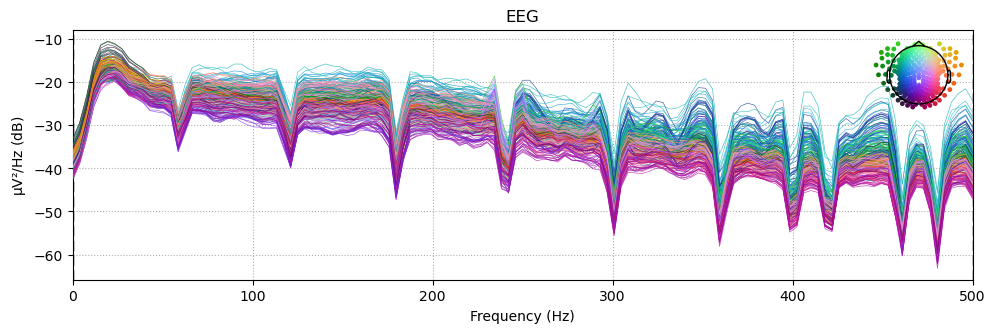

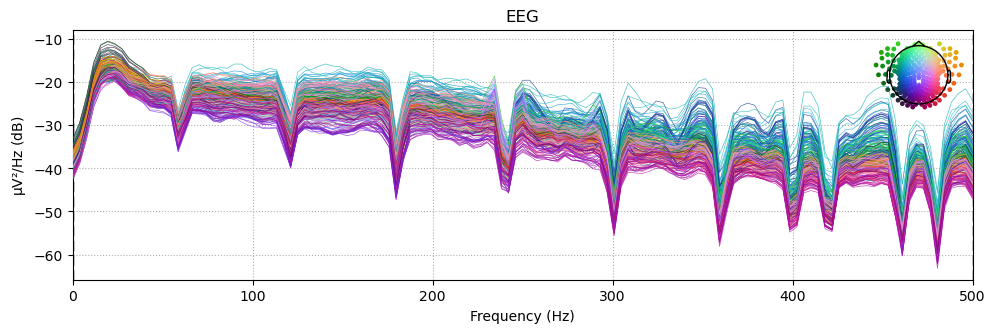

In [48]:
raw_avgref.compute_psd().plot()

In [22]:
epochs_newref.info['bads'] = ['VREF']

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/Users/Bella/mambaforge/envs/clean/lib/python3.12/site-packages/mne/viz/utils.py:137: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


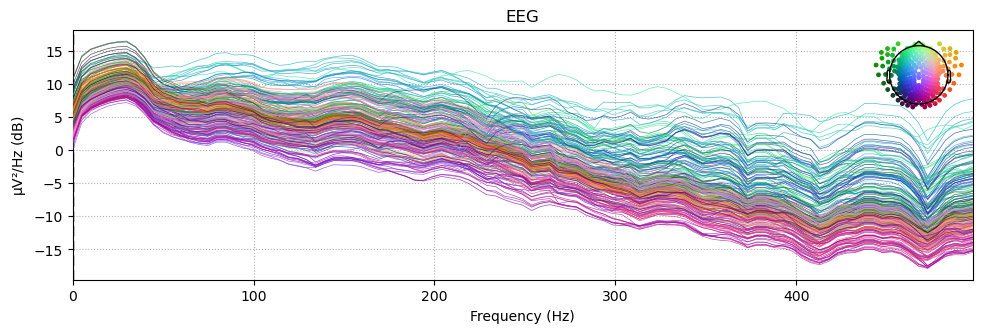

In [23]:
epochs_newref.compute_psd().plot(exclude='bads')

Not setting metadata
566 matching events found
No baseline correction applied
0 projection items activated


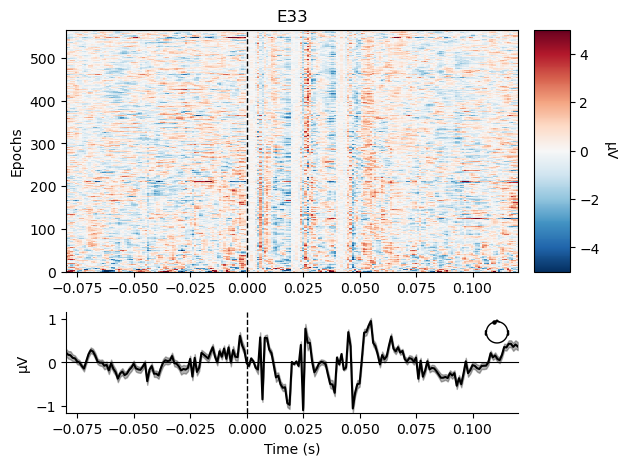

Not setting metadata
566 matching events found
No baseline correction applied
0 projection items activated


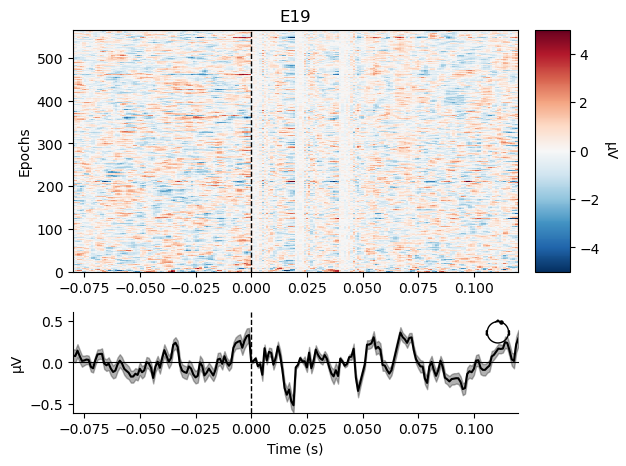

Not setting metadata
566 matching events found
No baseline correction applied
0 projection items activated


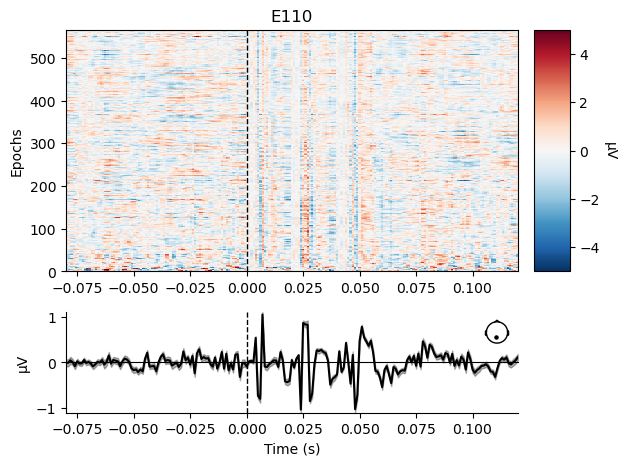

In [34]:
examples_for_trey = '/Users/Bella/Desktop/examples_for_trey'
fig = epochs_avgref.plot_image(picks='E33', vmin= -5, vmax= 5)
fig[0].axes[1].set_ylim([-3,3])
fig[0]
fig[0].savefig(f'{examples_for_trey}/{patient_id}_{day}_E33_nonresponder_clean_avgref.png')
fig = epochs_avgref.plot_image(picks='E19', vmin= -5, vmax= 5)
fig[0].axes[1].set_ylim([-3,3])
fig[0]
fig[0].savefig(f'{examples_for_trey}/{patient_id}_{day}_E19_nonresponder_clean_avgref.png')
fig = epochs_avgref.plot_image(picks='E110', vmin= -5, vmax= 5)
fig[0].axes[1].set_ylim([-3,3])
fig[0] ;

Not setting metadata
519 matching events found
No baseline correction applied
0 projection items activated


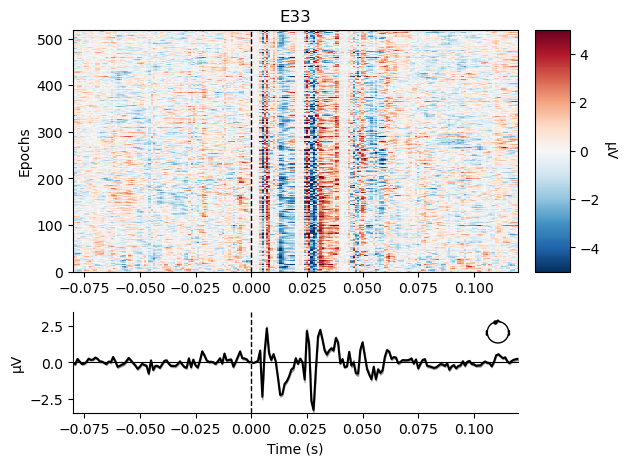

Not setting metadata
519 matching events found
No baseline correction applied
0 projection items activated


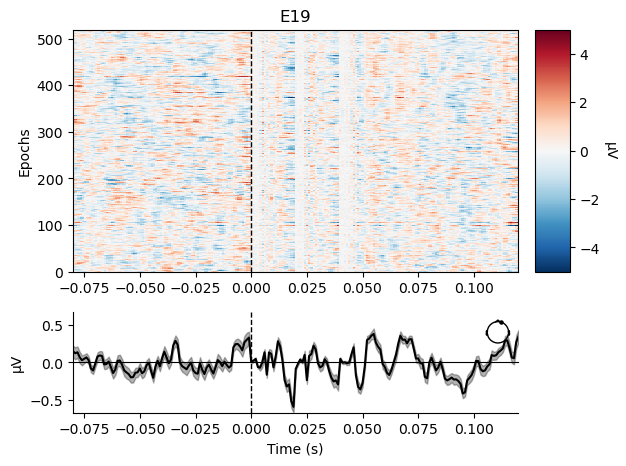

Not setting metadata
519 matching events found
No baseline correction applied
0 projection items activated


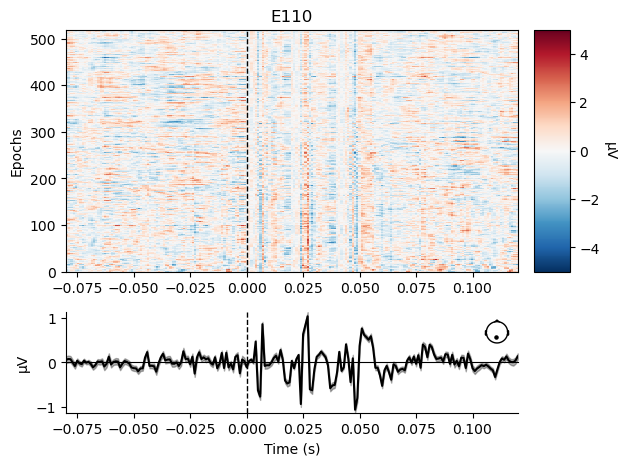

In [35]:
fig = epochs_newref.plot_image(picks='E33', vmin= -5, vmax= 5)
fig[0].axes[1].set_ylim([-3,3])
fig[0]
fig[0].savefig(f'{examples_for_trey}/{patient_id}_{day}_E33_nonresponder_clean_newref.png')
fig = epochs_newref.plot_image(picks='E19', vmin= -5, vmax= 5)
fig[0].axes[1].set_ylim([-3,3])
fig[0]
fig[0].savefig(f'{examples_for_trey}/{patient_id}_{day}_E19_nonresponder_clean_newref.png')
fig = epochs_newref.plot_image(picks='E110', vmin= -5, vmax= 5)
fig[0].axes[1].set_ylim([-3,3])
fig[0] ;

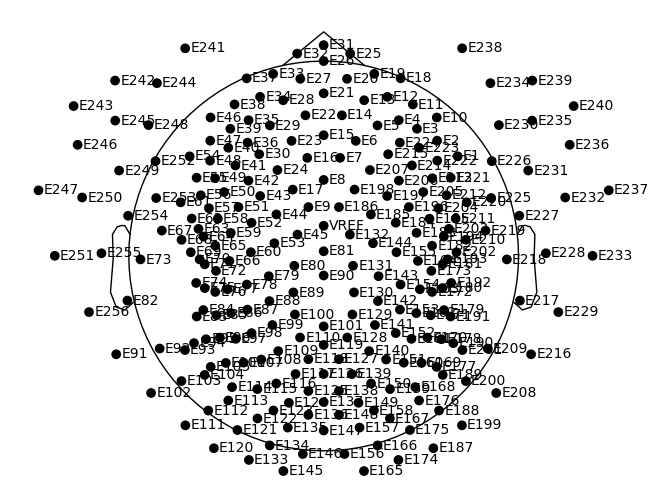

In [27]:
# Plot Electrode Locations
epochs.plot_sensors(show_names=True) ;

In [140]:
posterior_ch = ['E101', 'E110', 'E128']

posterior_evoked = epochs.copy().pick(picks = posterior_ch).average()

In [13]:
raw.plot()

Using pyopengl with version 3.1.6


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none


### Create Evoked 

In [43]:
# Create average evoked
avg_evoked = epochs_avgref.copy().average()

# Define left and right DLPFC sensors and create Evoked objects (23 channels per ROI)
l_dlpfc = epochs_avgref.copy().pick(picks=['E22', 'E23', 'E27', 'E28', 'E29', 'E30', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37',
                                   'E38', 'E39', 'E40', 'E41', 'E42', 'E46', 'E47', 'E48', 'E49', 'E54', 'E55']).average()
#l_dlpfc = epochs.copy().pick(picks=['E30', 'E35', 'E40', 'E46', 'E54', 'E55']).average()
r_dlpfc = epochs_avgref.copy().pick(picks=['E1','E2','E3','E4', 'E5', 'E6', 'E10', 'E11', 'E12', 'E13', 'E14', 'E18', 'E19', 
                                    'E20', 'E25', 'E206', 'E213', 'E214', 'E215', 'E221', 'E222', 'E223', 'E224']).average()
#r_dlpfc = epochs.copy().pick(picks=['E5', 'E10', 'E18', 'E20', 'E206', 'E223']).average()

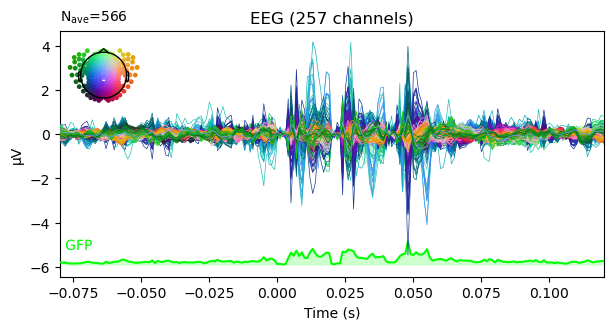

Projections have already been applied. Setting proj attribute to True.


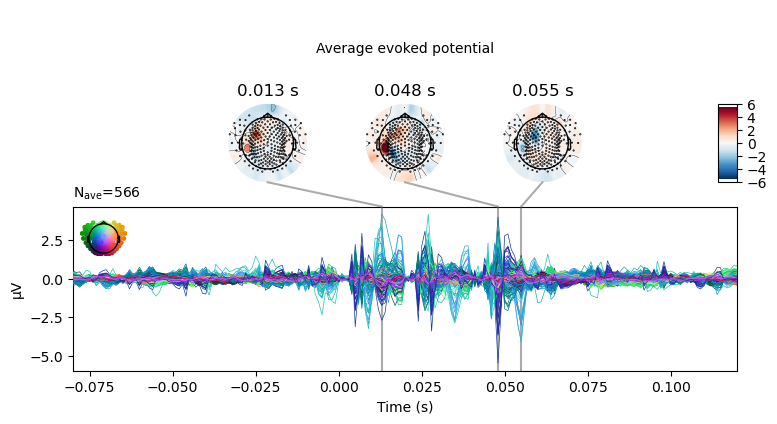

Fitted sphere radius:         96.5 mm
Origin head coordinates:      0.0 2.0 35.9 mm
Origin device coordinates:    0.0 2.0 35.9 mm
Projections have already been applied. Setting proj attribute to True.


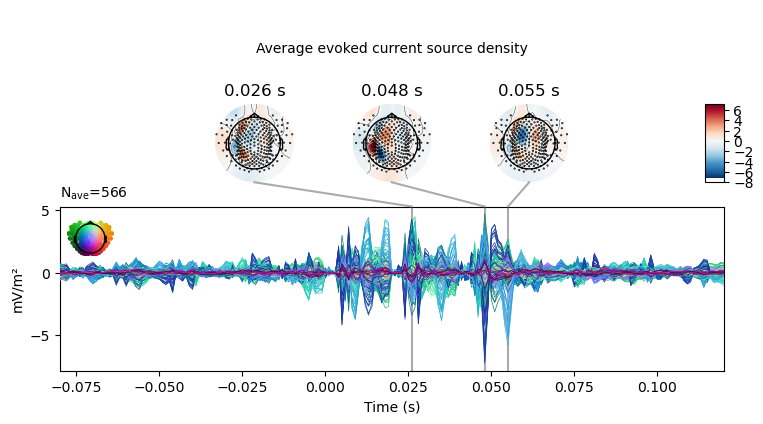

In [44]:
from mne.preprocessing import compute_current_source_density
%matplotlib inline

# Plot whole brain average evoked activity (microvolts)
fig = avg_evoked.plot(gfp=True)
fig.savefig(f'{examples_for_trey}/{patient_id}_{day}_average_evoked_activity_avgref.png')
fig = avg_evoked.plot_joint(title='Average evoked potential')
fig.savefig(f'{examples_for_trey}/{patient_id}_{day}_average_evoked_activity_with_topomap_avgref.png')

# Plot whole brain averaged evoked acitivity CSD (mV/m^2)
avg_evoked_csd = compute_current_source_density(avg_evoked)
fig = avg_evoked_csd.plot_joint(title='Average evoked current source density')
#fig.savefig(f'{ERP_TEP_path}/{patient_id}_{day}_average_CSD_with_topomap.png')

In [46]:
# Create average evoked
avg_evoked = epochs_newref.copy().average()

# Define left and right DLPFC sensors and create Evoked objects (23 channels per ROI)
l_dlpfc = epochs_newref.copy().pick(picks=['E22', 'E23', 'E27', 'E28', 'E29', 'E30', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37',
                                   'E38', 'E39', 'E40', 'E41', 'E42', 'E46', 'E47', 'E48', 'E49', 'E54', 'E55']).average()
#l_dlpfc = epochs.copy().pick(picks=['E30', 'E35', 'E40', 'E46', 'E54', 'E55']).average()
r_dlpfc = epochs_newref.copy().pick(picks=['E1','E2','E3','E4', 'E5', 'E6', 'E10', 'E11', 'E12', 'E13', 'E14', 'E18', 'E19', 
                                    'E20', 'E25', 'E206', 'E213', 'E214', 'E215', 'E221', 'E222', 'E223', 'E224']).average()
#r_dlpfc = epochs.copy().pick(picks=['E5', 'E10', 'E18', 'E20', 'E206', 'E223']).average()

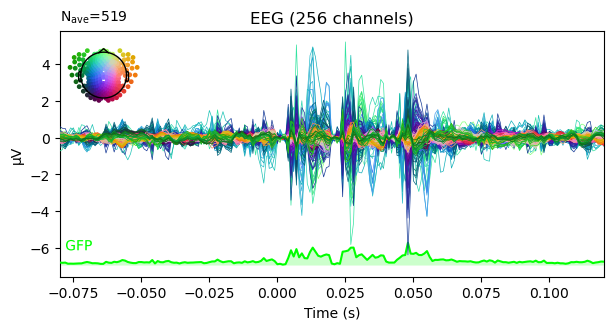

Projections have already been applied. Setting proj attribute to True.


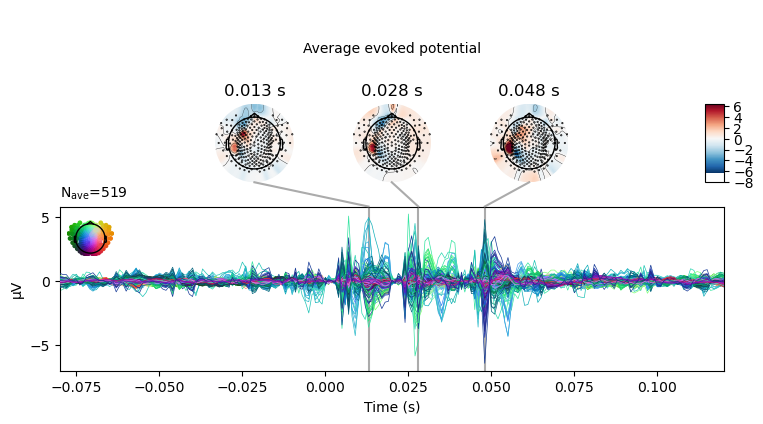

ValueError: CSD cannot be computed with bad EEG channels. Either drop (inst.drop_channels(inst.info['bads']) or interpolate (`inst.interpolate_bads()`) bad EEG channels.

In [47]:
from mne.preprocessing import compute_current_source_density
%matplotlib inline

# Plot whole brain average evoked activity (microvolts)
fig = avg_evoked.plot(gfp=True)
fig.savefig(f'{examples_for_trey}/{patient_id}_{day}_average_evoked_activity_newref.png')
fig = avg_evoked.plot_joint(title='Average evoked potential')
fig.savefig(f'{examples_for_trey}/{patient_id}_{day}_average_evoked_activity_with_topomap_newref.png')

# Plot whole brain averaged evoked acitivity CSD (mV/m^2)
avg_evoked_csd = compute_current_source_density(avg_evoked)
fig = avg_evoked_csd.plot_joint(title='Average evoked current source density')
#fig.savefig(f'{ERP_TEP_path}/{patient_id}_{day}_average_CSD_with_topomap.png')

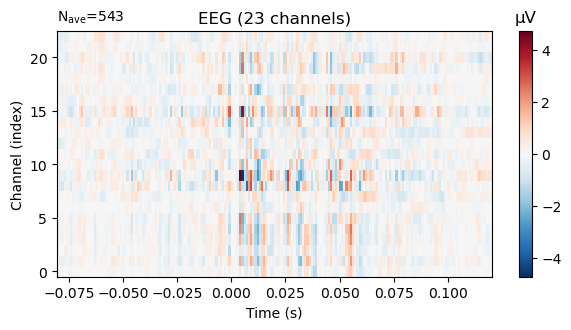

In [20]:
l_dlpfc.plot_image() ;

### Plot Evoked Potentials

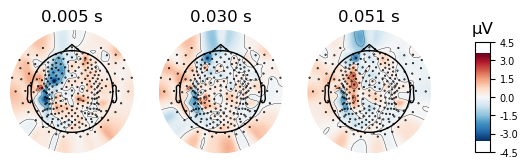

In [108]:
avg_evoked.plot_topomap(times = [0.005, 0.030, 0.051]) ;

Need more than one channel to make topography for eeg. Disabling interactivity.


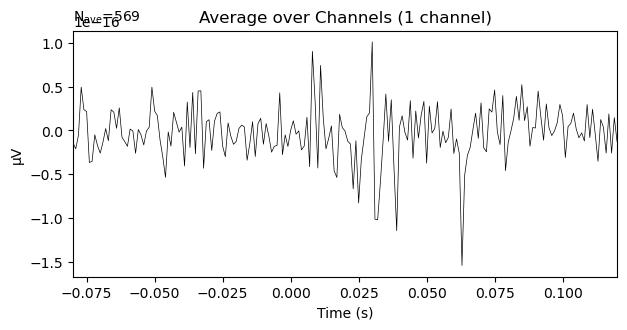

In [129]:
# Extract the data from the Evoked object
avg_evoked_data = avg_evoked.data

# Compute the mean across channels (axis 0)
average_data = np.mean(avg_evoked_data, axis=0, keepdims=True)

# Create a new Info object for the averaged data
new_info = mne.create_info(ch_names=['Average'], sfreq=l_dlpfc.info['sfreq'], ch_types='eeg')

# Create a new Evoked object with the averaged data
avg_evoked_average = mne.EvokedArray(average_data, new_info, tmin=l_dlpfc.times[0], nave=l_dlpfc.nave)

# Plot the averaged Evoked data
avg_evoked_average.plot(spatial_colors=False, titles='Average over Channels') ;

### Left DLPFC

In [121]:
l_dlpfc.info.keys()

dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])

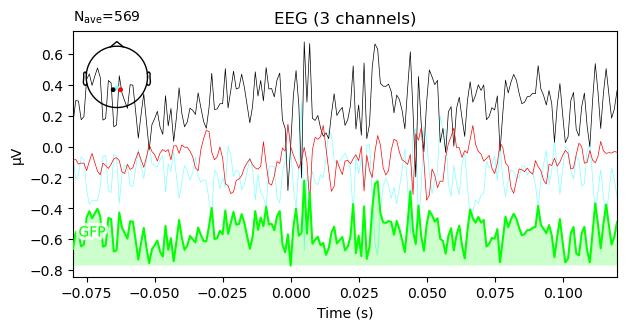

Fitted sphere radius:         96.5 mm
Origin head coordinates:      0.0 2.0 35.9 mm
Origin device coordinates:    0.0 2.0 35.9 mm


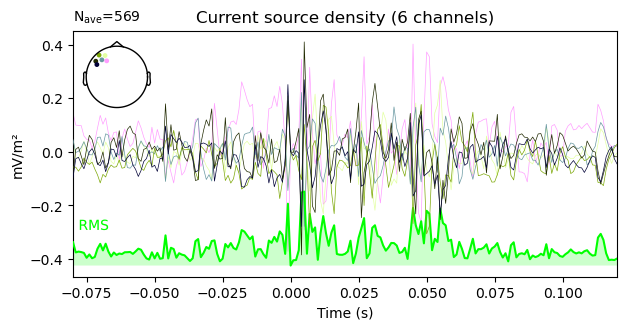

Projections have already been applied. Setting proj attribute to True.


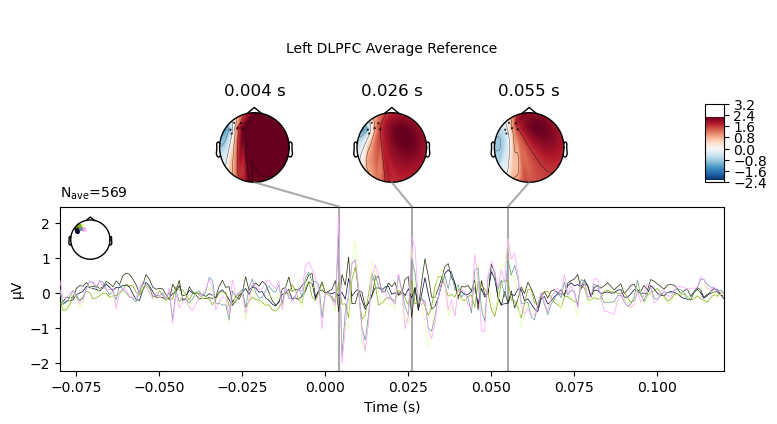

Projections have already been applied. Setting proj attribute to True.


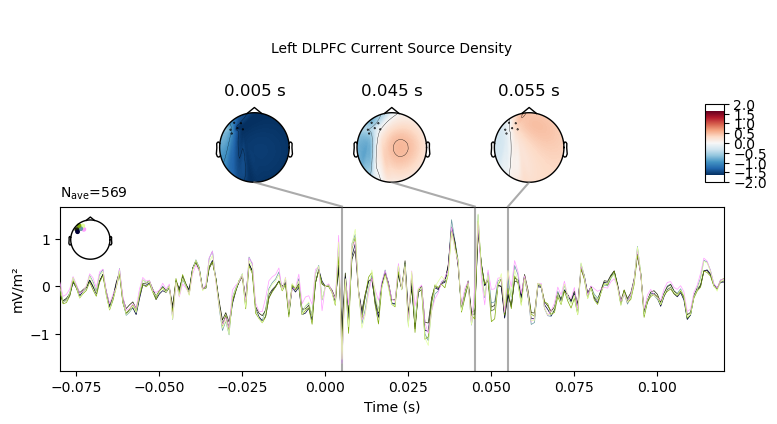

In [141]:
# Plot Left DLPFC evoked activity with global field power signal along bottom of plot
fig = posterior_evoked.plot(gfp=True, proj=True)
fig.savefig(f'{ERP_TEP_path}/{patient_id}_{day}_ldlpfc_evoked.png')

# Compute and plot evoked activity CSD for L-DLPFC
l_dlpfc_csd = mne.preprocessing.compute_current_source_density(l_dlpfc)
fig = l_dlpfc_csd.plot(gfp=True, proj=True)
fig.savefig(f'{ERP_TEP_path}/{patient_id}_{day}_ldlpfc_csd_evoked.png')

# Butterfly plots of L-DLPFC evoked responses with topomaps for peak GFP timepoints, comparing average reference and CSD
fig = l_dlpfc.plot_joint(title='Left DLPFC Average Reference')
fig.savefig(f'{ERP_TEP_path}/{patient_id}_{day}_ldlpfc_evoked_with_topomap.png')
fig = l_dlpfc_csd.plot_joint(title='Left DLPFC Current Source Density')
fig.savefig(f'{ERP_TEP_path}/{patient_id}_{day}_ldlpfc_csd_evoked_with_topomap.png')

Need more than one channel to make topography for eeg. Disabling interactivity.


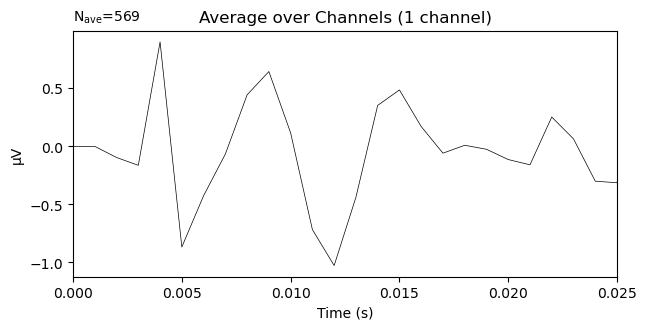

In [137]:
# Extract the data from the Evoked object
l_dlpfc_evoked_data = l_dlpfc.data

# Compute the mean across channels (axis 0)
average_data = np.mean(l_dlpfc_evoked_data, axis=0, keepdims=True)

# Create a new Info object for the averaged data
new_info = mne.create_info(ch_names=['Average'], sfreq=l_dlpfc.info['sfreq'], ch_types='eeg')

# Create a new Evoked object with the averaged data
l_dlpfc_average = mne.EvokedArray(average_data, new_info, tmin=l_dlpfc.times[0], nave=l_dlpfc.nave)

# Plot the averaged Evoked data
l_dlpfc_average.plot(spatial_colors=False, titles='Average over Channels', xlim = [0, 0.025]) ;

In [133]:
l_dlpfc_average.info

<Info | 7 non-empty values
 bads: []
 ch_names: Average
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 1000.0 Hz
>

### Right DLPFC

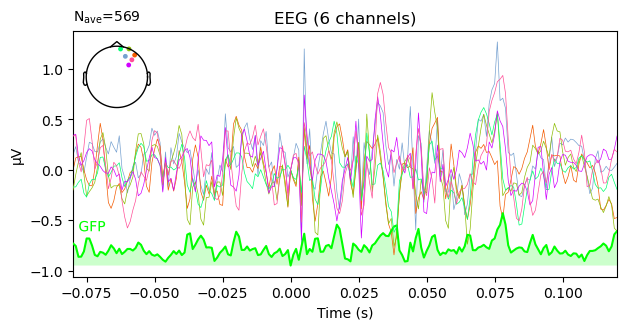

Fitted sphere radius:         96.5 mm
Origin head coordinates:      0.0 2.0 35.9 mm
Origin device coordinates:    0.0 2.0 35.9 mm


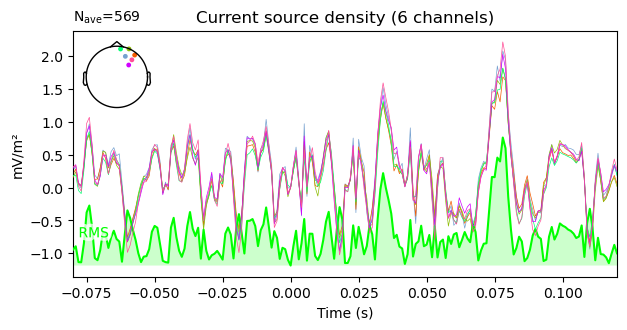

Projections have already been applied. Setting proj attribute to True.


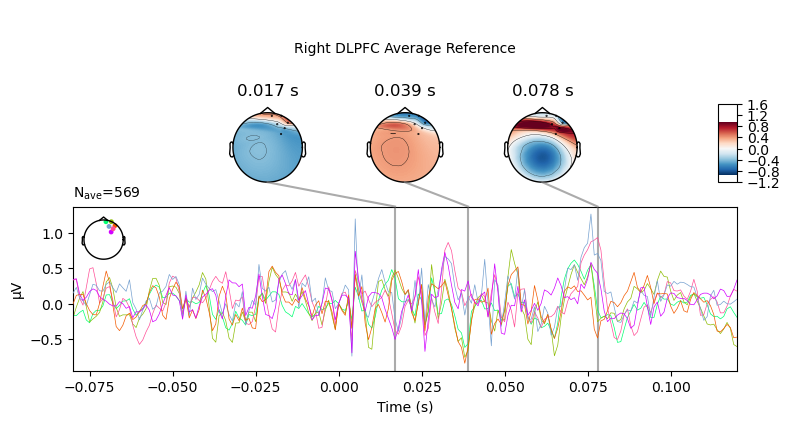

Projections have already been applied. Setting proj attribute to True.


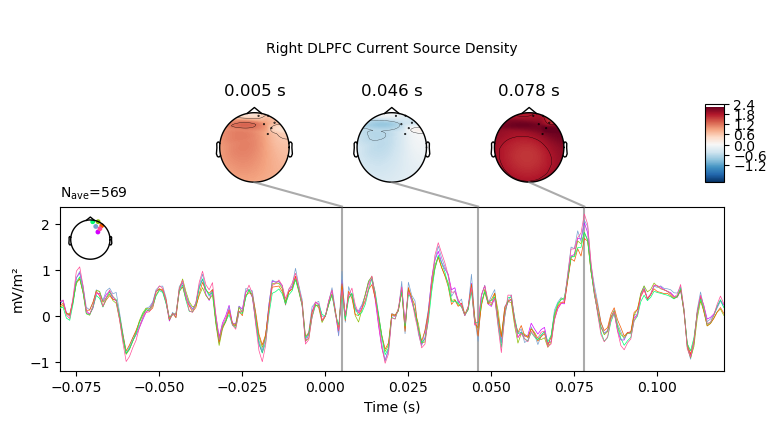

In [132]:
%matplotlib inline
# Plot evoked with global field power signal along bottom of plot
fig = r_dlpfc.plot(gfp=True)
fig.savefig(f'{ERP_TEP_path}/{patient_id}_{day}_rdlpfc_evoked.png')

# Compute CSD for R-DLPFC evoked
r_dlpfc_csd = mne.preprocessing.compute_current_source_density(r_dlpfc)
fig = r_dlpfc_csd.plot(gfp=True)
fig.savefig(f'{ERP_TEP_path}/{patient_id}_{day}_rdlpfc_csd_evoked.png')

# Butterfly plots of R-DLPFC evoked responses with topomaps for peak GFP timepoints, comparing average reference and CSD
fig = r_dlpfc.plot_joint(title='Right DLPFC Average Reference')
fig.savefig(f'{ERP_TEP_path}/{patient_id}_{day}_rdlpfc_evoked_with_topomap.png')
fig = r_dlpfc_csd.plot_joint(title='Right DLPFC Current Source Density')
fig.savefig(f'{ERP_TEP_path}/{patient_id}_{day}_rdlpfc_csd_evoked_with_topomap.png')

### Topomap animations

In [22]:
%matplotlib qt
# Average Evoked Response
anim = avg_evoked.animate_topomap(ch_type='eeg', frame_rate=2, blit=False)

Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...


In [ ]:
# Left and Right DLPFC
anim = l_dlpfc.animate_topomap(ch_type='eeg', frame_rate=2, blit=False)
#anim = r_dlpfc.animate_topomap(ch_type='eeg', frame_rate=2, blit=False)

### Peak Latency

#### Peak latency: the time point at which the peak amplitude occurred (during a specified window)

In [32]:
# Define time windows (sec)
# Windows of interest: N15 after each pulse. P30, N45, and P60 after third pulse. N100?
# Pulse 1 = 0 sec, Pulse 2 = 20 ms, Pulse 3 = 40 ms
# Added +40 ms to P30, N45, and P60 times (to make relative to pulse 3)

# N15
n15_1_min, n15_1_max = 0.007, 0.020  # pulse 1
n15_2_min, n15_2_max = 0.027, 0.040  # pulse 2
n15_3_min, n15_3_max = 0.047, 0.060  # pulse 3

# P30
p30_min, p30_max = 0.065, 0.075

# N45
n45_min, n45_max = 0.075, 0.095

# P60
p60_min, p60_max = 0.095, 0.105
#n100_min, n100_max = 0.090, 0.110

In [33]:
# Overall
overall_ch, overall_latency, overall_amp = avg_evoked.get_peak(tmin=0, tmax=0.12, mode='abs', return_amplitude=True)
print(f'Average Peak Measures. Time window: 0 - 120 ms')
print(f'Peak channel: {overall_ch}, Peak latency: {overall_latency:.3f} ms, Peak amplitude: {overall_amp * 1e6:.3f} uV \n')

# DLPFC TEPs
# N15-1
Ln15_1_ch, Ln15_1_latency, Ln15_1_amp = l_dlpfc.get_peak(tmin=n15_1_min, tmax=n15_1_max, mode='abs', return_amplitude=True)
Rn15_1_ch, Rn15_1_latency, Rn15_1_amp = r_dlpfc.get_peak(tmin=n15_1_min, tmax=n15_1_max, mode='abs', return_amplitude=True)
print(f'N15-1 Peak Measures. Time window: {n15_1_min * 1e3} - {n15_1_max * 1e3} ms')
print(f'Left DLPFC: Peak channel: {Ln15_1_ch}, Peak latency: {Ln15_1_latency * 1e3:.2f} ms, Peak amplitude: {Ln15_1_amp * 1e6:.3f} uV')
print(f'Right DLPFC: Peak channel: {Rn15_1_ch}, Peak latency: {Rn15_1_latency * 1e3:.2f} ms, Peak amplitude: {Rn15_1_amp * 1e6:.3f} uV \n')

# N15-2
Ln15_2_ch, Ln15_2_latency, Ln15_2_amp = l_dlpfc.get_peak(tmin=n15_2_min, tmax=n15_2_max, mode='abs', return_amplitude=True)
Rn15_2_ch, Rn15_2_latency, Rn15_2_amp = r_dlpfc.get_peak(tmin=n15_2_min, tmax=n15_2_max, mode='abs', return_amplitude=True)
print(f'N15-2 Peak Measures. Time window: {n15_2_min * 1e3} - {n15_2_max * 1e3} ms')
print(f'Left DLPFC: Peak channel: {Ln15_2_ch}, Peak latency: {Ln15_2_latency * 1e3:.2f} ms, Peak amplitude: {Ln15_2_amp * 1e6:.3f} uV')
print(f'Right DLPFC: Peak channel: {Rn15_2_ch}, Peak latency: {Rn15_2_latency * 1e3:.2f} ms, Peak amplitude: {Rn15_2_amp * 1e6:.3f} uV \n')

# N15-3
Ln15_3_ch, Ln15_3_latency, Ln15_3_amp = l_dlpfc.get_peak(tmin=n15_3_min, tmax=n15_3_max, mode='abs', return_amplitude=True)
Rn15_3_ch, Rn15_3_latency, Rn15_3_amp = r_dlpfc.get_peak(tmin=n15_3_min, tmax=n15_3_max, mode='abs', return_amplitude=True)
print(f'N15-3 Peak Measures. Time window: {n15_3_min * 1e3} - {n15_3_max * 1e3} ms')
print(f'Left DLPFC: Peak channel: {Ln15_3_ch}, Peak latency: {Ln15_3_latency * 1e3:.2f} ms, Peak amplitude: {Ln15_3_amp * 1e6:.3f} uV')
print(f'Right DLPFC: Peak channel: {Rn15_3_ch}, Peak latency: {Rn15_3_latency * 1e3:.2f} ms, Peak amplitude: {Rn15_3_amp * 1e6:.3f} uV \n')

# P30
Lp30_ch, Lp30_latency, Lp30_amp = l_dlpfc.get_peak(tmin=p30_min, tmax=p30_max, mode='abs', return_amplitude=True)
Rp30_ch, Rp30_latency, Rp30_amp = r_dlpfc.get_peak(tmin=p30_min, tmax=p30_max, mode='abs', return_amplitude=True)
print(f'P30 Peak Measures. Time window: {p30_min * 1e3} - {p30_max * 1e3} ms')
print(f'Left DLPFC: Peak channel: {Lp30_ch}, Peak latency: {Lp30_latency * 1e3:.2f} ms, Peak amplitude: {Lp30_amp * 1e6:.3f} uV')
print(f'Right DLPFC: Peak channel: {Rp30_ch}, Peak latency: {Rp30_latency * 1e3:.3f} ms, Peak amplitude: {Rp30_amp * 1e6:.3f} uV \n')

# N45
Ln45_ch, Ln45_latency, Ln45_amp = l_dlpfc.get_peak(tmin=n45_min, tmax=n45_max, mode='abs', return_amplitude=True)
Rn45_ch, Rn45_latency, Rn45_amp = r_dlpfc.get_peak(tmin=n45_min, tmax=n45_max, mode='abs', return_amplitude=True)
print(f'N45 Peak Measures. Time window: {n45_min * 1e3} - {n45_max * 1e3} ms')
print(f'Left DLPFC: Peak channel: {Ln45_ch}, Peak latency: {Ln45_latency * 1e3:.2f} ms, Peak amplitude: {Ln45_amp * 1e6:.3f} uV')
print(f'Right DLPFC: Peak channel: {Rn45_ch}, Peak latency: {Rn45_latency * 1e3:.2f} ms, Peak amplitude: {Rn45_amp * 1e6:.3f} uV \n')

# P60
Lp60_ch, Lp60_latency, Lp60_amp = l_dlpfc.get_peak(tmin=p60_min, tmax=p60_max, mode='abs', return_amplitude=True)
Rp60_ch, Rp60_latency, Rp60_amp = r_dlpfc.get_peak(tmin=p60_min, tmax=p60_max, mode='abs', return_amplitude=True)
print(f'P60 Peak Measures. Time window: {p60_min * 1e3} - {p60_max * 1e3} ms')
print(f'Left DLPFC: Peak channel: {Lp60_ch}, Peak latency: {Lp60_latency * 1e3:.2f} ms, Peak amplitude: {Lp60_amp * 1e6:.3f} uV')
print(f'Right DLPFC: Peak channel: {Rp60_ch}, Peak latency: {Rp60_latency * 1e3:.3f} ms, Peak amplitude: {Rp60_amp * 1e6:.3f} uV \n')

# N100
#Ln100_ch, Ln100_latency, Ln100_amp = l_dlpfc.get_peak(tmin=n100_min, tmax=n100_max, mode='abs', return_amplitude=True)
#Rn100_ch, Rn100_latency, Rn100_amp = r_dlpfc.get_peak(tmin=n100_min, tmax=n100_max, mode='abs', return_amplitude=True)
#print(f'N100 Peak Measures. Time window: {n100_min * 1e3} - {n100_max * 1e3} ms')
#print(f'Left DLPFC: Peak channel: {Ln100_ch}, Peak latency: {Ln100_latency * 1e3:.2f} ms, Peak amplitude: {Ln100_amp * 1e6:.3f} uV')
#print(f'Right DLPFC: Peak channel: {Rn100_ch}, Peak latency: {Rn100_latency * 1e3:.2f} ms, Peak amplitude: {Rn100_amp * 1e6:.3f} uV')

Average Peak Measures. Time window: 0 - 120 ms
Peak channel: E51, Peak latency: 0.005 ms, Peak amplitude: -4.645 uV 

N15-1 Peak Measures. Time window: 7.0 - 20.0 ms
Left DLPFC: Peak channel: E34, Peak latency: 7.00 ms, Peak amplitude: -4.520 uV
Right DLPFC: Peak channel: E12, Peak latency: 9.00 ms, Peak amplitude: -1.330 uV 

N15-2 Peak Measures. Time window: 27.0 - 40.0 ms
Left DLPFC: Peak channel: E34, Peak latency: 30.00 ms, Peak amplitude: -3.113 uV
Right DLPFC: Peak channel: E2, Peak latency: 38.00 ms, Peak amplitude: -0.997 uV 

N15-3 Peak Measures. Time window: 47.0 - 60.0 ms
Left DLPFC: Peak channel: E34, Peak latency: 50.00 ms, Peak amplitude: -3.195 uV
Right DLPFC: Peak channel: E12, Peak latency: 58.00 ms, Peak amplitude: -1.037 uV 

P30 Peak Measures. Time window: 65.0 - 75.0 ms
Left DLPFC: Peak channel: E23, Peak latency: 73.00 ms, Peak amplitude: 0.656 uV
Right DLPFC: Peak channel: E2, Peak latency: 66.000 ms, Peak amplitude: -0.992 uV 

N45 Peak Measures. Time window: 7

### Mean Amplitude

#### Mean amplitude: the mean amplitude during a specified time window. Also known as ERP components

In [34]:
# N15-1
l_dlpfc_n15_1_crop = l_dlpfc.copy().crop(tmin=n15_1_min, tmax=n15_1_max)
r_dlpfc_n15_1_crop = r_dlpfc.copy().crop(tmin=n15_1_min, tmax=n15_1_max)
avg_evoked_n15_1_crop = avg_evoked.copy().crop(tmin=n15_1_min, tmax=n15_1_max)

n15_1_ldlpfc_mean_amp = l_dlpfc_n15_1_crop.data.mean()
n15_1_rdlpfc_mean_amp = r_dlpfc_n15_1_crop.data.mean()
n15_1_avg_evoked_mean_amp = avg_evoked_n15_1_crop.data.mean()

print(f'N15-1 \nMean Amplitude: {n15_1_avg_evoked_mean_amp * 1e6:.5f} uV')
print(f'Left DLPFC: {n15_1_ldlpfc_mean_amp * 1e6:.5f} uV')
print(f'Right DLPFC: {n15_1_rdlpfc_mean_amp * 1e6:.5f} uV \n')

# N15-2
l_dlpfc_n15_2_crop = l_dlpfc.copy().crop(tmin=n15_2_min, tmax=n15_2_max)
r_dlpfc_n15_2_crop = r_dlpfc.copy().crop(tmin=n15_2_min, tmax=n15_2_max)
avg_evoked_n15_2_crop = avg_evoked.copy().crop(tmin=n15_2_min, tmax=n15_2_max)

n15_2_ldlpfc_mean_amp = l_dlpfc_n15_2_crop.data.mean()
n15_2_rdlpfc_mean_amp = r_dlpfc_n15_2_crop.data.mean()
n15_2_avg_evoked_mean_amp = avg_evoked_n15_2_crop.data.mean()

print(f'N15-2 \nMean Amplitude: {n15_2_avg_evoked_mean_amp * 1e6:.5f} uV')
print(f'Left DLPFC: {n15_2_ldlpfc_mean_amp * 1e6:.5f} uV')
print(f'Right DLPFC: {n15_2_rdlpfc_mean_amp * 1e6:.5f} uV \n')

# N15-3
l_dlpfc_n15_3_crop = l_dlpfc.copy().crop(tmin=n15_3_min, tmax=n15_3_max)
r_dlpfc_n15_3_crop = r_dlpfc.copy().crop(tmin=n15_3_min, tmax=n15_3_max)
avg_evoked_n15_3_crop = avg_evoked.copy().crop(tmin=n15_3_min, tmax=n15_3_max)

n15_3_ldlpfc_mean_amp = l_dlpfc_n15_3_crop.data.mean()
n15_3_rdlpfc_mean_amp = r_dlpfc_n15_3_crop.data.mean()
n15_3_avg_evoked_mean_amp = avg_evoked_n15_3_crop.data.mean()

print(f'N15-3 \nMean Amplitude: {n15_3_avg_evoked_mean_amp * 1e6:.5f} uV')
print(f'Left DLPFC: {n15_3_ldlpfc_mean_amp * 1e6:.5f} uV')
print(f'Right DLPFC: {n15_3_rdlpfc_mean_amp * 1e6:.5f} uV \n')

# P30
l_dlpfc_p30_crop = l_dlpfc.copy().crop(tmin=p30_min, tmax=p30_max)
r_dlpfc_p30_crop = r_dlpfc.copy().crop(tmin=p30_min, tmax=p30_max)
avg_evoked_p30_crop = avg_evoked.copy().crop(tmin=p30_min, tmax=p30_max)

p30_ldlpfc_mean_amp = l_dlpfc_p30_crop.data.mean()
p30_rdlpfc_mean_amp = r_dlpfc_p30_crop.data.mean()
p30_avg_evoked_mean_amp = avg_evoked_p30_crop.data.mean()

print(f'P30 \nMean Amplitude: {p30_avg_evoked_mean_amp * 1e6:.5f} uV')
print(f'Left DLPFC: {p30_ldlpfc_mean_amp * 1e6:.5f} uV')
print(f'Right DLPFC: {p30_rdlpfc_mean_amp * 1e6:.5f} uV \n')

# N45
l_dlpfc_n45_crop = l_dlpfc.copy().crop(tmin=n45_min, tmax=n45_max)
r_dlpfc_n45_crop = r_dlpfc.copy().crop(tmin=n45_min, tmax=n45_max)
avg_evoked_n45_crop = avg_evoked.copy().crop(tmin=n45_min, tmax=n45_max)

n45_ldlpfc_mean_amp = l_dlpfc_n45_crop.data.mean()
n45_rdlpfc_mean_amp = r_dlpfc_n45_crop.data.mean()
n45_avg_evoked_mean_amp = avg_evoked_n45_crop.data.mean()

print(f'N45 \nMean Amplitude: {n45_avg_evoked_mean_amp * 1e6:.5f} uV')
print(f'Left DLPFC: {n45_ldlpfc_mean_amp * 1e6:.5f} uV')
print(f'Right DLPFC: {n45_rdlpfc_mean_amp * 1e6:.5f} uV \n')


# P60
l_dlpfc_p60_crop = l_dlpfc.copy().crop(tmin=p60_min, tmax=p60_max)
r_dlpfc_p60_crop = r_dlpfc.copy().crop(tmin=p60_min, tmax=p60_max)
avg_evoked_p60_crop = avg_evoked.copy().crop(tmin=p60_min, tmax=p60_max)

p60_ldlpfc_mean_amp = l_dlpfc_p60_crop.data.mean()
p60_rdlpfc_mean_amp = r_dlpfc_p60_crop.data.mean()
p60_avg_evoked_mean_amp = avg_evoked_p60_crop.data.mean()

print(f'P60 \nMean Amplitude: {p60_avg_evoked_mean_amp * 1e6:.5f} uV')
print(f'Left DLPFC: {p60_ldlpfc_mean_amp * 1e6:.5f} uV')
print(f'Right DLPFC: {p60_rdlpfc_mean_amp * 1e6:.5f} uV \n')


# N100
#l_dlpfc_n100_crop = l_dlpfc.copy().crop(tmin=n100_min, tmax=n100_max)
#r_dlpfc_n100_crop = r_dlpfc.copy().crop(tmin=n100_min, tmax=n100_max)
#avg_evoked_n100_crop = avg_evoked.copy().crop(tmin=n100_min, tmax=n100_max)

#n100_ldlpfc_mean_amp = l_dlpfc_n100_crop.data.mean()
#n100_rdlpfc_mean_amp = r_dlpfc_n100_crop.data.mean()
#n100_avg_evoked_mean_amp = avg_evoked_n100_crop.data.mean()

#print(f'N100 \nMean Amplitude: {n100_avg_evoked_mean_amp * 1e6:.5f} uV')
#print(f'Left DLPFC: {n100_ldlpfc_mean_amp * 1e6:.5f} uV')
#print(f'Right DLPFC: {n100_rdlpfc_mean_amp * 1e6:.5f} uV')

N15-1 
Mean Amplitude: 0.00000 uV
Left DLPFC: -0.02405 uV
Right DLPFC: -0.01258 uV 

N15-2 
Mean Amplitude: -0.00000 uV
Left DLPFC: -0.11669 uV
Right DLPFC: -0.01564 uV 

N15-3 
Mean Amplitude: -0.00000 uV
Left DLPFC: 0.06568 uV
Right DLPFC: -0.04833 uV 

P30 
Mean Amplitude: -0.00000 uV
Left DLPFC: -0.05980 uV
Right DLPFC: 0.14864 uV 

N45 
Mean Amplitude: -0.00000 uV
Left DLPFC: -0.04558 uV
Right DLPFC: 0.00461 uV 

P60 
Mean Amplitude: -0.00000 uV
Left DLPFC: -0.02250 uV
Right DLPFC: 0.10511 uV 



Mean amplitude values are very low. May need to adjust time windows or take a different approach. Why are whole-brain values 0?

#### Mean Amplitude CSD

In [35]:
# N15-1
l_dlpfc_n15_1_crop = l_dlpfc_csd.copy().crop(tmin=n15_1_min, tmax=n15_1_max)
r_dlpfc_n15_1_crop = r_dlpfc_csd.copy().crop(tmin=n15_1_min, tmax=n15_1_max)
avg_evoked_n15_1_crop = avg_evoked_csd.copy().crop(tmin=n15_1_min, tmax=n15_1_max)

n15_1_ldlpfc_mean_amp = l_dlpfc_n15_1_crop.data.mean()
n15_1_rdlpfc_mean_amp = r_dlpfc_n15_1_crop.data.mean()
n15_1_avg_evoked_mean_amp = avg_evoked_n15_1_crop.data.mean()

print(f'N15-1 CSD \nMean Amplitude: {n15_1_avg_evoked_mean_amp * 1e6:.5f} uV')
print(f'Left DLPFC: {n15_1_ldlpfc_mean_amp * 1e6:.5f} uV')
print(f'Right DLPFC: {n15_1_rdlpfc_mean_amp * 1e6:.5f} uV \n')

# N15-2
l_dlpfc_n15_2_crop = l_dlpfc_csd.copy().crop(tmin=n15_2_min, tmax=n15_2_max)
r_dlpfc_n15_2_crop = r_dlpfc_csd.copy().crop(tmin=n15_2_min, tmax=n15_2_max)
avg_evoked_n15_2_crop = avg_evoked_csd.copy().crop(tmin=n15_2_min, tmax=n15_2_max)

n15_2_ldlpfc_mean_amp = l_dlpfc_n15_2_crop.data.mean()
n15_2_rdlpfc_mean_amp = r_dlpfc_n15_2_crop.data.mean()
n15_2_avg_evoked_mean_amp = avg_evoked_n15_2_crop.data.mean()

print(f'N15-2 CSD \nMean Amplitude: {n15_2_avg_evoked_mean_amp * 1e6:.5f} uV')
print(f'Left DLPFC: {n15_2_ldlpfc_mean_amp * 1e6:.5f} uV')
print(f'Right DLPFC: {n15_2_rdlpfc_mean_amp * 1e6:.5f} uV \n')

# N15-3
l_dlpfc_n15_3_crop = l_dlpfc_csd.copy().crop(tmin=n15_3_min, tmax=n15_3_max)
r_dlpfc_n15_3_crop = r_dlpfc_csd.copy().crop(tmin=n15_3_min, tmax=n15_3_max)
avg_evoked_n15_3_crop = avg_evoked_csd.copy().crop(tmin=n15_3_min, tmax=n15_3_max)

n15_3_ldlpfc_mean_amp = l_dlpfc_n15_3_crop.data.mean()
n15_3_rdlpfc_mean_amp = r_dlpfc_n15_3_crop.data.mean()
n15_3_avg_evoked_mean_amp = avg_evoked_n15_3_crop.data.mean()

print(f'N15-3 CSD \nMean Amplitude: {n15_3_avg_evoked_mean_amp * 1e6:.5f} uV')
print(f'Left DLPFC: {n15_3_ldlpfc_mean_amp * 1e6:.5f} uV')
print(f'Right DLPFC: {n15_3_rdlpfc_mean_amp * 1e6:.5f} uV \n')

# P30
l_dlpfc_p30_crop = l_dlpfc_csd.copy().crop(tmin=p30_min, tmax=p30_max)
r_dlpfc_p30_crop = r_dlpfc_csd.copy().crop(tmin=p30_min, tmax=p30_max)
avg_evoked_p30_crop = avg_evoked_csd.copy().crop(tmin=p30_min, tmax=p30_max)

p30_ldlpfc_mean_amp = l_dlpfc_p30_crop.data.mean()
p30_rdlpfc_mean_amp = r_dlpfc_p30_crop.data.mean()
p30_avg_evoked_mean_amp = avg_evoked_p30_crop.data.mean()

print(f'P30 CSD \nMean Amplitude: {p30_avg_evoked_mean_amp * 1e6:.5f} uV')
print(f'Left DLPFC: {p30_ldlpfc_mean_amp * 1e6:.5f} uV')
print(f'Right DLPFC: {p30_rdlpfc_mean_amp * 1e6:.5f} uV \n')

# N45
l_dlpfc_n45_crop = l_dlpfc_csd.copy().crop(tmin=n45_min, tmax=n45_max)
r_dlpfc_n45_crop = r_dlpfc_csd.copy().crop(tmin=n45_min, tmax=n45_max)
avg_evoked_n45_crop = avg_evoked_csd.copy().crop(tmin=n45_min, tmax=n45_max)

n45_ldlpfc_mean_amp = l_dlpfc_n45_crop.data.mean()
n45_rdlpfc_mean_amp = r_dlpfc_n45_crop.data.mean()
n45_avg_evoked_mean_amp = avg_evoked_n45_crop.data.mean()

print(f'N45 CSD \nMean Amplitude: {n45_avg_evoked_mean_amp * 1e6:.5f} uV')
print(f'Left DLPFC: {n45_ldlpfc_mean_amp * 1e6:.5f} uV')
print(f'Right DLPFC: {n45_rdlpfc_mean_amp * 1e6:.5f} uV \n')


# P60
l_dlpfc_p60_crop = l_dlpfc_csd.copy().crop(tmin=p60_min, tmax=p60_max)
r_dlpfc_p60_crop = r_dlpfc_csd.copy().crop(tmin=p60_min, tmax=p60_max)
avg_evoked_p60_crop = avg_evoked_csd.copy().crop(tmin=p60_min, tmax=p60_max)

p60_ldlpfc_mean_amp = l_dlpfc_p60_crop.data.mean()
p60_rdlpfc_mean_amp = r_dlpfc_p60_crop.data.mean()
p60_avg_evoked_mean_amp = avg_evoked_p60_crop.data.mean()

print(f'P60 CSD \nMean Amplitude: {p60_avg_evoked_mean_amp * 1e6:.5f} uV')
print(f'Left DLPFC: {p60_ldlpfc_mean_amp * 1e6:.5f} uV')
print(f'Right DLPFC: {p60_rdlpfc_mean_amp * 1e6:.5f} uV \n')


# N100
#l_dlpfc_n100_crop = l_dlpfc_csd.copy().crop(tmin=n100_min, tmax=n100_max)
#r_dlpfc_n100_crop = r_dlpfc_csd.copy().crop(tmin=n100_min, tmax=n100_max)
#avg_evoked_n100_crop = avg_evoked_csd.copy().crop(tmin=n100_min, tmax=n100_max)

#n100_ldlpfc_mean_amp = l_dlpfc_n100_crop.data.mean()
#n100_rdlpfc_mean_amp = r_dlpfc_n100_crop.data.mean()
#n100_avg_evoked_mean_amp = avg_evoked_n100_crop.data.mean()

#print(f'N100 CSD \nMean Amplitude: {n100_avg_evoked_mean_amp * 1e6:.5f} uV')
#print(f'Left DLPFC: {n100_ldlpfc_mean_amp * 1e6:.5f} uV')
#print(f'Right DLPFC: {n100_rdlpfc_mean_amp * 1e6:.5f} uV')

N15-1 CSD 
Mean Amplitude: 10.99577 uV
Left DLPFC: -51.53225 uV
Right DLPFC: 87.14248 uV 

N15-2 CSD 
Mean Amplitude: 9.06790 uV
Left DLPFC: -195.42742 uV
Right DLPFC: 125.43326 uV 

N15-3 CSD 
Mean Amplitude: 9.44289 uV
Left DLPFC: 192.27285 uV
Right DLPFC: 4.15948 uV 

P30 CSD 
Mean Amplitude: 21.32497 uV
Left DLPFC: -164.03034 uV
Right DLPFC: 188.12828 uV 

N45 CSD 
Mean Amplitude: 0.39892 uV
Left DLPFC: -71.95095 uV
Right DLPFC: 145.31214 uV 

P60 CSD 
Mean Amplitude: 5.38354 uV
Left DLPFC: -67.77397 uV
Right DLPFC: 399.27250 uV 

